In [1]:
%pip install xarray netCDF4 matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numpy-2.3.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached certifi-2025.8.3-py3-none-any.whl.metadata (2.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.3 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.3 MB 1.2 MB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.3 MB 1.2 MB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.3 MB 1.2 MB/s eta 0:00:01
   ------------------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import xarray as xr

# Load the NetCDF file
ds = xr.open_dataset("dataset.nc")   # replace with your file name

print(ds)


<xarray.Dataset> Size: 113MB
Dimensions:      (time: 1747, nv: 2, lat: 90, lon: 180)
Coordinates:
  * lat          (lat) float32 360B -89.0 -87.0 -85.0 -83.0 ... 85.0 87.0 89.0
  * lon          (lon) float32 720B -179.0 -177.0 -175.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 14kB 1880-01-15 1880-02-15 ... 2025-07-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] 28kB ...
    tempanomaly  (time, lat, lon) float32 113MB ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2025-08-06 04:53:16 by SBBX_to_nc 2.0 - ILAND=1200,...


In [3]:
print(ds.variables)
print(ds.dims)

Frozen({'time_bnds': <xarray.Variable (time: 1747, nv: 2)> Size: 28kB
[3494 values with dtype=datetime64[ns]], 'tempanomaly': <xarray.Variable (time: 1747, lat: 90, lon: 180)> Size: 113MB
[28301400 values with dtype=float32]
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean, 'lat': <xarray.IndexVariable 'lat' (lat: 90)> Size: 360B
array([-89., -87., -85., -83., -81., -79., -77., -75., -73., -71., -69., -67.,
       -65., -63., -61., -59., -57., -55., -53., -51., -49., -47., -45., -43.,
       -41., -39., -37., -35., -33., -31., -29., -27., -25., -23., -21., -19.,
       -17., -15., -13., -11.,  -9.,  -7.,  -5.,  -3.,  -1.,   1.,   3.,   5.,
         7.,   9.,  11.,  13.,  15.,  17.,  19.,  21.,  23.,  25.,  27.,  29.,
        31.,  33.,  35.,  37.,  39.,  41.,  43.,  45.,  47.,  49.,  51.,  53.,
        55.,  57.,  59.,  61.,  63.,  65.,  67.,  69.,  71.,  73.,  75.,  77.,
        79.,  81.,  83.,  85.,  87.,  89.], dtype=floa

In [5]:
data = ds['tempanomaly']
print(data.shape)
print(data)

(1747, 90, 180)
<xarray.DataArray 'tempanomaly' (time: 1747, lat: 90, lon: 180)> Size: 113MB
[28301400 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 360B -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 720B -179.0 -177.0 -175.0 ... 175.0 177.0 179.0
  * time     (time) datetime64[ns] 14kB 1880-01-15 1880-02-15 ... 2025-07-15
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean


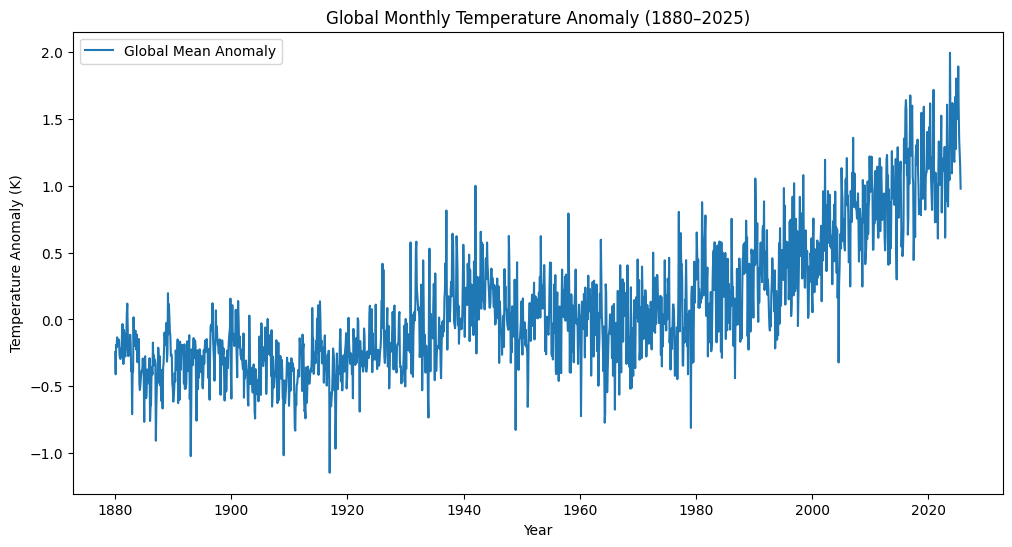

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(global_temp['time'], global_temp, label="Global Mean Anomaly")
plt.title("Global Monthly Temperature Anomaly (1880–2025)")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (K)")
plt.legend()
plt.show()


In [12]:
# Subset for Pakistan region (lat: 24–37, lon: 60–77)
pakistan = data.sel(lat=slice(24, 37), lon=slice(60, 77)).mean(dim=["lat", "lon"])


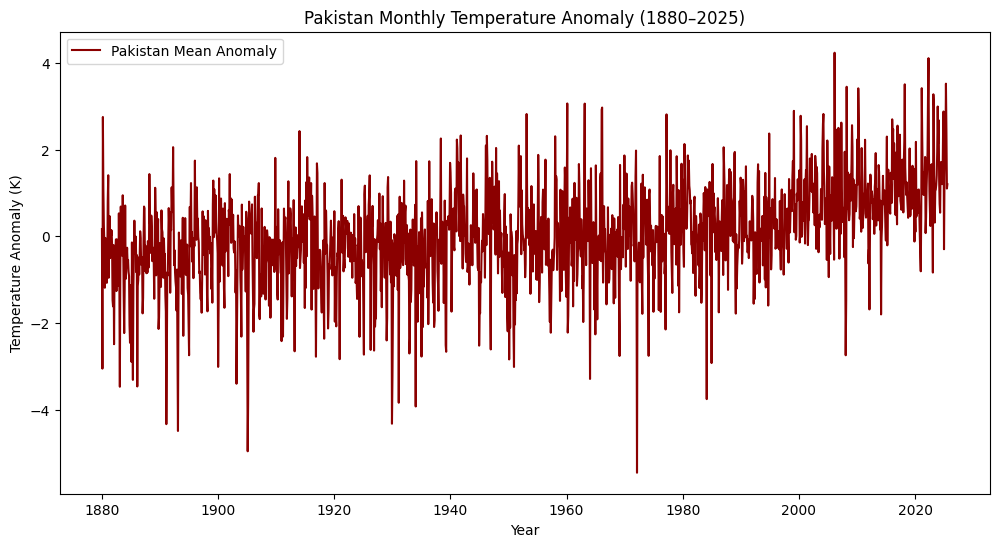

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(pakistan['time'], pakistan, label="Pakistan Mean Anomaly", color="darkred")
plt.title("Pakistan Monthly Temperature Anomaly (1880–2025)")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (K)")
plt.legend()
plt.show()


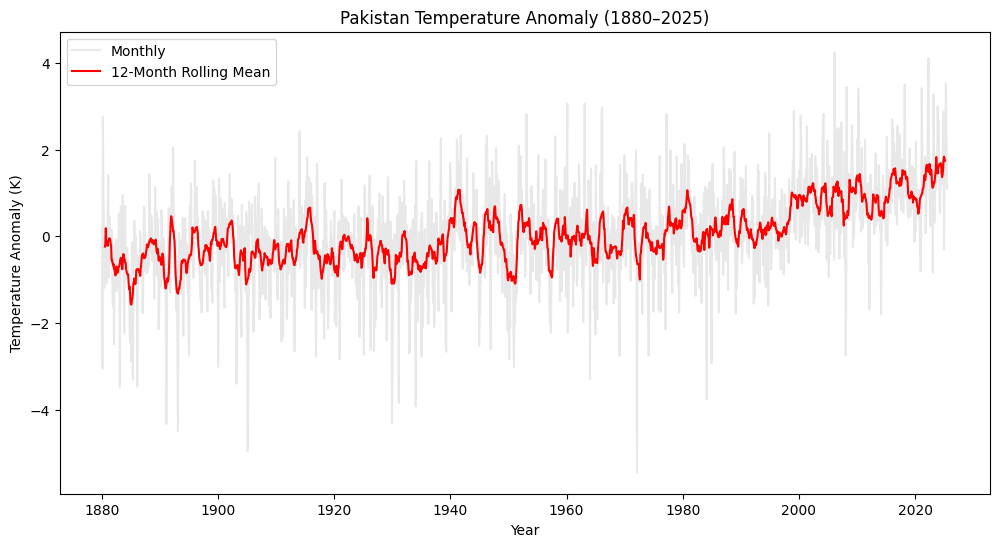

In [14]:
pakistan_rolling = pakistan.rolling(time=12, center=True).mean()  # 12 months = 1 year

plt.figure(figsize=(12,6))
plt.plot(pakistan['time'], pakistan, alpha=0.5, label="Monthly", color="lightgray")
plt.plot(pakistan_rolling['time'], pakistan_rolling, label="12-Month Rolling Mean", color="red")
plt.title("Pakistan Temperature Anomaly (1880–2025)")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (K)")
plt.legend()
plt.show()


Step 1: Basic Data Inspection

In [16]:
print(pakistan)
print(pakistan.shape)
print(pakistan.time.min().values, pakistan.time.max().values)


<xarray.DataArray 'tempanomaly' (time: 1747)> Size: 7kB
array([ 0.16666666, -3.0549204 ,  2.7566667 , ...,  2.4630158 ,
        1.1042856 ,  1.2033333 ], shape=(1747,), dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 14kB 1880-01-15 1880-02-15 ... 2025-07-15
(1747,)
1880-01-15T00:00:00.000000000 2025-07-15T00:00:00.000000000


Step 2: Raw Monthly Plot

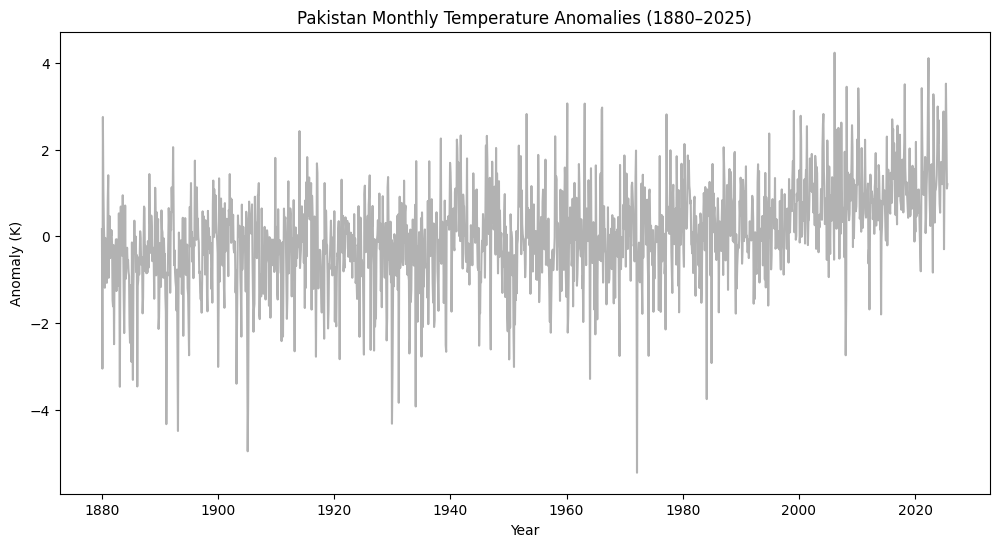

In [17]:
plt.figure(figsize=(12,6))
plt.plot(pakistan['time'], pakistan, alpha=0.6, color="gray")
plt.title("Pakistan Monthly Temperature Anomalies (1880–2025)")
plt.xlabel("Year")
plt.ylabel("Anomaly (K)")
plt.show()


Step 4: Decadal Averages

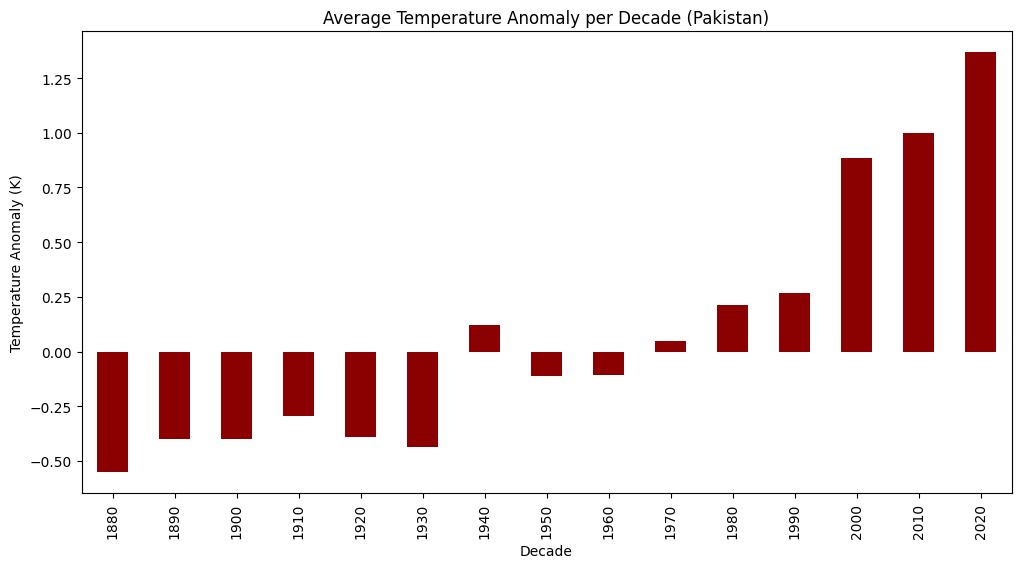

In [18]:
# Convert to Pandas for grouping
pakistan_df = pakistan.to_pandas()
pakistan_decade = pakistan_df.groupby((pakistan_df.index.year // 10) * 10).mean()

pakistan_decade.plot(kind="bar", figsize=(12,6), color="darkred")
plt.title("Average Temperature Anomaly per Decade (Pakistan)")
plt.xlabel("Decade")
plt.ylabel("Temperature Anomaly (K)")
plt.show()


Step 5: Seasonal Analysis

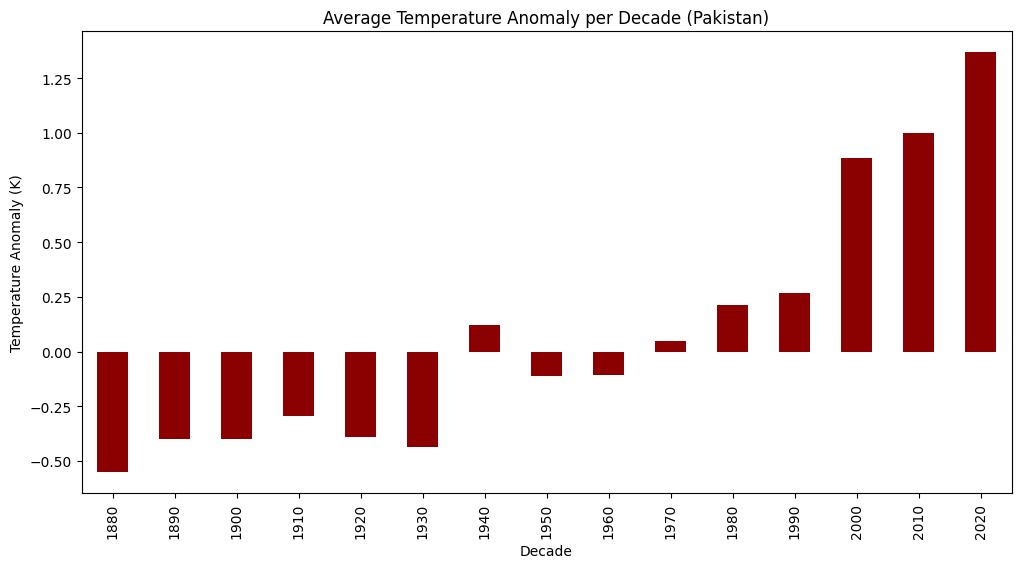

In [19]:
# Convert to Pandas for grouping
pakistan_df = pakistan.to_pandas()
pakistan_decade = pakistan_df.groupby((pakistan_df.index.year // 10) * 10).mean()

pakistan_decade.plot(kind="bar", figsize=(12,6), color="darkred")
plt.title("Average Temperature Anomaly per Decade (Pakistan)")
plt.xlabel("Decade")
plt.ylabel("Temperature Anomaly (K)")
plt.show()


Step 6: Distribution of Anomalies

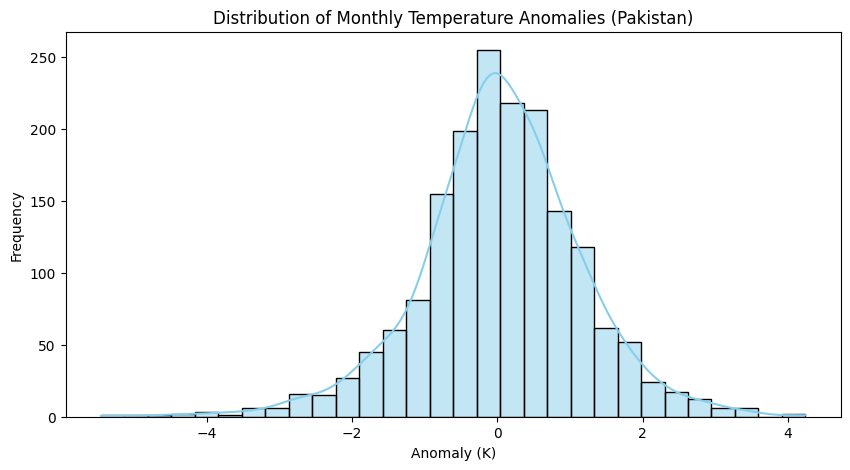

In [20]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(pakistan_df, bins=30, kde=True, color="skyblue")
plt.title("Distribution of Monthly Temperature Anomalies (Pakistan)")
plt.xlabel("Anomaly (K)")
plt.ylabel("Frequency")
plt.show()


Step 7: Trend Decomposition

In [22]:
%pip install statsmodels

  Using cached scipy-1.16.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 1.2 MB/s eta 0:00:08
   --- ------------------------------------ 0.8/9.6 MB 1.2 MB/s eta 0:00:08
   ---- ----------------------------------- 1.0/9.6 MB 1.2 MB/s eta 0:00:08
   ----- ---------------------------------- 1.3/9.6 MB 1.2 MB/s eta 0:00:08
   ------ --------------------------------- 1.6/9.6 MB 1.2 MB/s eta 0:00:07
   ------- -------------------------------- 1.8/9.6 MB 1.2 MB/s eta 0:00:07
   -------- ------------------------------- 2.1/9.6 MB 1.2 MB/s eta 0:00:07
   --------- ------------------------------ 2.4/9.6 MB 1.2 MB/s eta 0:00:07
   ---------- ----------------------------- 2.6/9.6 MB 1.2 MB/s eta 0:00:06
   ------------ ----------------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


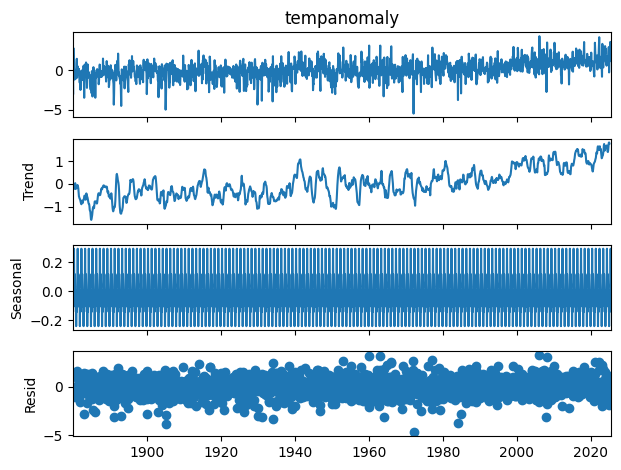

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(pakistan_df, model="additive", period=12)
decomp.plot()
plt.show()


FORECASTING


🔹 Step 1: Prepare Data

In [24]:
import pandas as pd

# Convert to DataFrame with time as index
pakistan_df = pakistan.to_dataframe().reset_index()[['time','tempanomaly']]
pakistan_df = pakistan_df.set_index('time').sort_index()

# Drop missing values (if any)
pakistan_df = pakistan_df.dropna()


🔹 Step 2: ARIMA Forecasting

k:\PersonalProjects\data_analysis\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
k:\PersonalProjects\data_analysis\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
k:\PersonalProjects\data_analysis\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
k:\PersonalProjects\data_analysis\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer ind

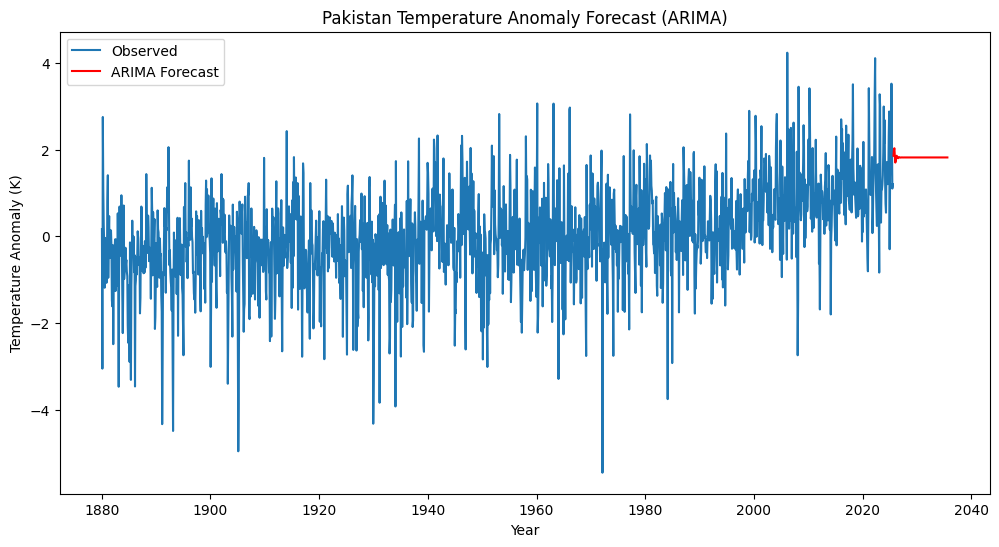

In [25]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit ARIMA model (p,d,q chosen automatically later via trial/error)
model = ARIMA(pakistan_df['tempanomaly'], order=(5,1,0))
model_fit = model.fit()

# Forecast next 120 months (10 years)
forecast_steps = 120
forecast = model_fit.forecast(steps=forecast_steps)

# Plot
plt.figure(figsize=(12,6))
plt.plot(pakistan_df.index, pakistan_df['tempanomaly'], label="Observed")
plt.plot(pd.date_range(pakistan_df.index[-1], periods=forecast_steps+1, freq="M")[1:], forecast, color="red", label="ARIMA Forecast")
plt.title("Pakistan Temperature Anomaly Forecast (ARIMA)")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (K)")
plt.legend()
plt.show()


🔹 Step 3: Prophet Forecasting

In [27]:
%pip install prophet

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.3 MB 1.2 MB/s eta 0:00:11
   - -------------------------------------- 0.5/13.3 MB 1.2 MB/s eta 0:00:11
   --- ------------------------------------ 1.0/13.3 MB 1.2 MB/s eta 0:00:11
   --- ------------------------------------ 1.3/13.3 MB 1.2 MB/s eta 0:00:11
   ---- ----------------------------------- 1.6/13.3 MB 1.2 MB/s eta 0:00:11
   ---- ----------------------------------- 1.6/13.3 MB 1.2 MB/s eta 0:00:11
   ------ --------------------------------- 2.1/13.3 MB 1.2 MB/s eta 0:00:10
   ------- -------------------------------- 2.4/13.3 MB 1.2 MB/s eta 0:00:10
   ------- --------------------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


k:\PersonalProjects\data_analysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
00:48:49 - cmdstanpy - INFO - Chain [1] start processing
00:48:49 - cmdstanpy - INFO - Chain [1] done processing
k:\PersonalProjects\data_analysis\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


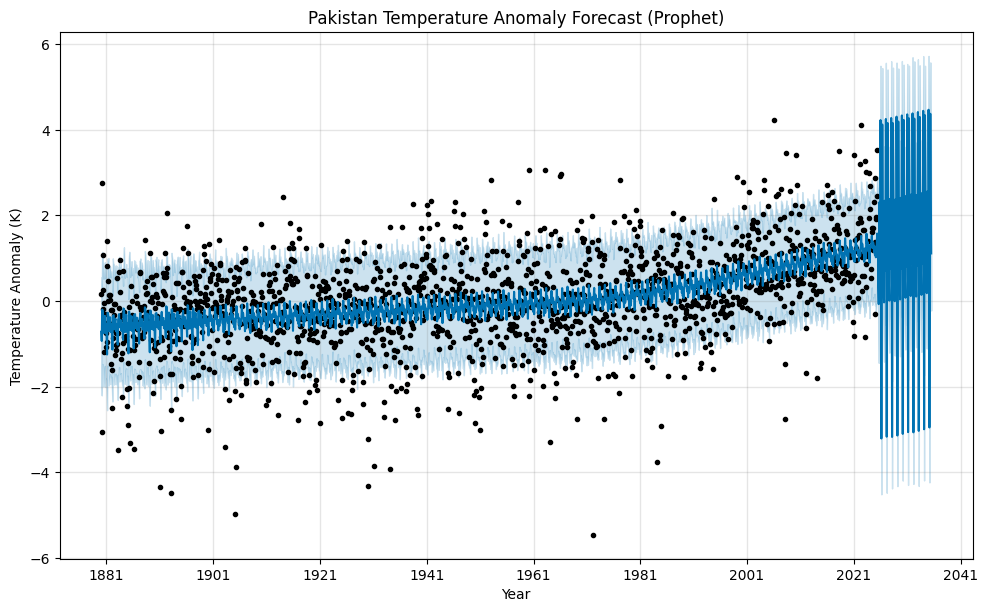

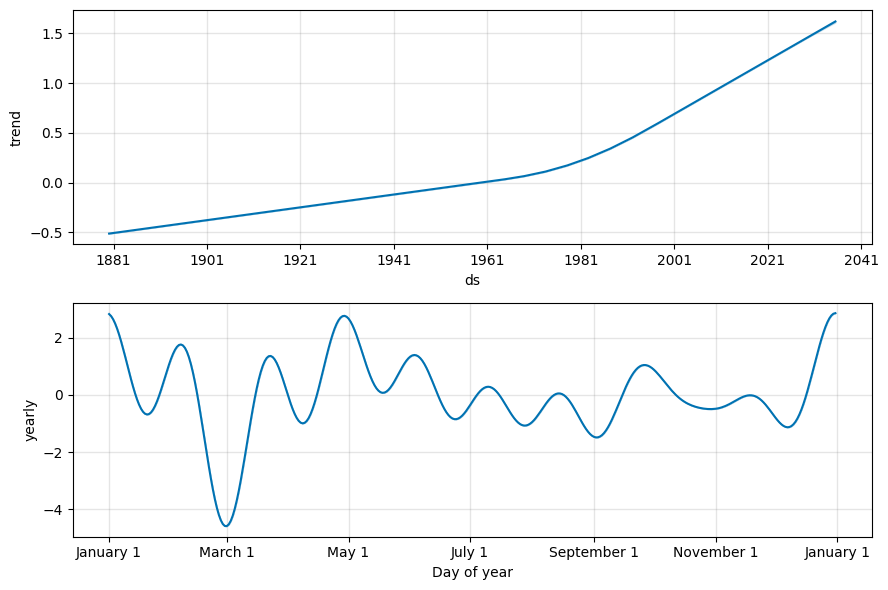

In [28]:
from prophet import Prophet

# Prophet needs columns: ds (date), y (value)
prophet_df = pakistan_df.reset_index().rename(columns={'time':'ds','tempanomaly':'y'})

# Fit model
m = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
m.fit(prophet_df)

# Make future dataframe (10 years ahead)
future = m.make_future_dataframe(periods=120, freq='M')
forecast = m.predict(future)

# Plot results
fig1 = m.plot(forecast)
plt.title("Pakistan Temperature Anomaly Forecast (Prophet)")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (K)")
plt.show()

# Components (trend + seasonality)
fig2 = m.plot_components(forecast)


🔹 Top Panel: Trend

The line shows the long-term warming trend of Pakistan’s temperature anomaly from ~1880 to 2040.

You can see:

Before ~1960, anomalies stayed close to zero (slight negative).

After ~1980, there’s a sharp rise — confirming accelerated warming.

Forecast suggests that by 2040, anomalies could exceed +1.5 K compared to the baseline.

Interpretation: Pakistan has been warming more rapidly in recent decades, and the trend will likely continue, crossing critical thresholds.

🔹 Bottom Panel: Yearly Seasonality

This captures recurring seasonal effects within a year.

Notice the oscillating pattern:

Peaks (positive anomalies) around January, May → hotter than baseline.

Dips (negative anomalies) around March, July, October → cooler relative to baseline.

Interpretation: Pakistan’s anomalies are not uniform through the year; warming has a seasonal cycle where some months deviate more strongly.

regional breakdown

In [29]:
# Regional subsets
north = data.sel(lat=slice(30,37), lon=slice(70,77)).mean(dim=["lat","lon"])
south = data.sel(lat=slice(24,29), lon=slice(60,67)).mean(dim=["lat","lon"])
east  = data.sel(lat=slice(28,33), lon=slice(70,75)).mean(dim=["lat","lon"])


🔹 Step 3: Rolling Mean for Trends

In [30]:
north_roll = north.rolling(time=12, center=True).mean()
south_roll = south.rolling(time=12, center=True).mean()
east_roll  = east.rolling(time=12, center=True).mean()


🔹 Step 4: Plot Regional Comparison

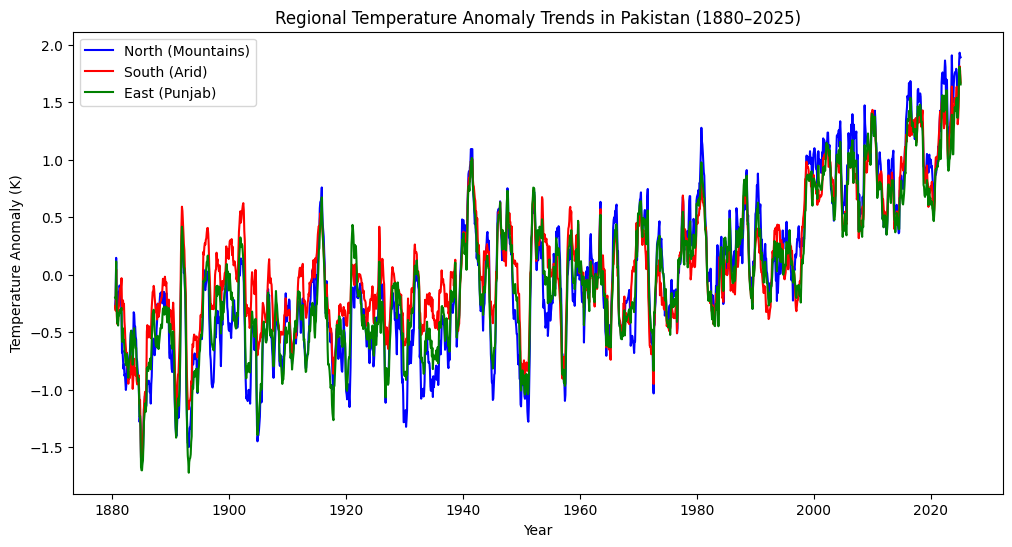

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(north['time'], north_roll, label="North (Mountains)", color="blue")
plt.plot(south['time'], south_roll, label="South (Arid)", color="red")
plt.plot(east['time'], east_roll, label="East (Punjab)", color="green")

plt.title("Regional Temperature Anomaly Trends in Pakistan (1880–2025)")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (K)")
plt.legend()
plt.show()


Overall Trend

All three regions — North (Mountains), South (Arid), East (Punjab) — follow the same long-term warming trajectory.

From ~1880–1950, anomalies fluctuate around -1.0 to +0.5 K, with no strong warming signal.

After ~1980, all regions show a sharp upward trend, with anomalies consistently above 0 and climbing towards +2.0 K by 2025.

Regional Similarity

The three lines (blue, red, green) are very close together → this suggests Pakistan’s warming is broad-based across regions.

Differences are minor, meaning the entire country is experiencing similar temperature anomaly patterns.

Peaks and Volatility

There are short-term spikes and dips due to natural variability (ENSO events, volcanic activity, monsoon fluctuations).

Despite these, the long-term signal is clear: persistent warming across all regions.

🔹 Why This Matters

North (Mountains) → Even a small warming is dangerous for glaciers (Himalayas, Karakoram, Hindu Kush). Melting increases flood risk (like Pakistan’s 2022 floods).

South (Arid) → Already hot and dry; warming intensifies droughts, heatwaves, water scarcity.

East (Punjab) → Agricultural heartland; warming affects crop yields, irrigation demand, and food security.

So even though the trends look similar, the impacts differ drastically by region.

🔹 Next Step: Statistical Comparison-linear regression slopes for each region.

In [34]:
%pip install scikit-learn

  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 1.2 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/8.7 MB 1.2 MB/s eta 0:00:07
   ---- ----------------------------------- 1.0/8.7 MB 1.2 MB/s eta 0:00:07
   ------ --------------------------------- 1.3/8.7 MB 1.2 MB/s eta 0:00:07
   ------- -------------------------------- 1.6/8.7 MB 1.2 MB/s eta 0:00:06
   -------- ------------------------------- 1.8/8.7 MB 1.2 MB/s eta 0:00:06
   -------- ------------------------------- 1.8/8.7 MB 1.2 MB/s eta 0:00:06
   -------- ------------------------------- 1.8/8.7 MB 1.2 MB/s eta 0:00:06
   --------- ------------------------------ 2.1/8.7 M


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import numpy as np
from sklearn.linear_model import LinearRegression

def warming_rate(region, name):
    df = region.to_dataframe().reset_index()[['time','tempanomaly']].dropna()
    X = np.arange(len(df)).reshape(-1,1)  # time as index
    y = df['tempanomaly'].values
    model = LinearRegression().fit(X,y)
    slope = model.coef_[0]
    print(f"{name}: {slope*120:.3f} °C per decade")  # 120 months ≈ 10 years

warming_rate(north, "North (Mountains)")
warming_rate(south, "South (Arid)")
warming_rate(east,  "East (Punjab)")


North (Mountains): 0.130 °C per decade
South (Arid): 0.092 °C per decade
East (Punjab): 0.114 °C per decade


📊 Results

North (Mountains): 0.130 °C per decade
The northern mountain regions are warming the fastest. This is critical because these areas contain Himalayan and Karakoram glaciers, which are Pakistan’s main water source. Faster warming = accelerated glacier melt = increased flood risk in the short term, and water scarcity in the long term.

South (Arid): 0.092 °C per decade
The southern arid regions are warming at a slower pace than the mountains, but even this “slower” rate means more frequent and intense heatwaves. Since this is already a hot and dry region, a ~0.1 °C rise every decade worsens drought, desertification, and water stress.

East (Punjab): 0.114 °C per decade
Punjab shows a moderate warming rate. Being the agricultural hub of Pakistan, even small changes in temperature here can reduce crop yields, soil moisture, and food security.

🌍 Interpretation

Regional differences matter

The North faces glacier loss.

The South faces harsher heat/drought.

The East faces agricultural stress.

This regional breakdown shows why a “one-size-fits-all” climate policy won’t work for Pakistan — adaptation strategies must be regional.

The rates seem smaller, but they accumulate

Over 50 years, the North warms by ~0.65 °C.

Over 100 years, that’s ~1.3 °C — on top of natural variability.

That’s enough to cause ecosystem shifts, water crises, and extreme events.

Consistent positive warming trend
All slopes are positive → confirms that Pakistan is warming everywhere. The climate change signal is clear and not just “noise”.

statistical test (like p-values, confidence intervals for slopes)

In [36]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

def warming_rate_significance(region, name):
    # Convert to dataframe
    df = region.to_dataframe().reset_index()[['time','tempanomaly']].dropna()
    
    # Create time index as numeric
    X = np.arange(len(df))  # numeric time (months)
    y = df['tempanomaly'].values
    
    # Add constant term for statsmodels
    X = sm.add_constant(X)
    
    # Fit OLS regression
    model = sm.OLS(y, X).fit()
    
    slope = model.params[1]
    p_value = model.pvalues[1]
    ci_low, ci_high = model.conf_int()[1]  # confidence interval for slope
    
    # Convert slope from per month to per decade (120 months ~ 10 years)
    slope_decade = slope * 120
    ci_low_decade = ci_low * 120
    ci_high_decade = ci_high * 120
    
    print(f"{name}: {slope_decade:.3f} °C per decade "
          f"(95% CI: {ci_low_decade:.3f} – {ci_high_decade:.3f}, "
          f"p={p_value:.4f})")

# Run for each region
warming_rate_significance(north, "North (Mountains)")
warming_rate_significance(south, "South (Arid)")
warming_rate_significance(east,  "East (Punjab)")


North (Mountains): 0.130 °C per decade (95% CI: 0.117 – 0.143, p=0.0000)
South (Arid): 0.092 °C per decade (95% CI: 0.082 – 0.102, p=0.0000)
East (Punjab): 0.114 °C per decade (95% CI: 0.103 – 0.125, p=0.0000)


📊 Results (with statistical significance)

North (Mountains):
Warming at 0.130 °C per decade
95% CI: 0.117 – 0.143 °C per decade, p < 0.001
→ Very strong evidence of warming. The glaciers and snow-fed rivers in this region are at risk of accelerated melt.

South (Arid):
Warming at 0.092 °C per decade
95% CI: 0.082 – 0.102 °C per decade, p < 0.001
→ Statistically significant but slower than the North. Still, this is alarming because arid regions are already prone to heatwaves and drought.

East (Punjab):
Warming at 0.114 °C per decade
95% CI: 0.103 – 0.125 °C per decade, p < 0.001
→ Strong and significant warming. Punjab is Pakistan’s agricultural hub, so this trend directly threatens crop yields and food security.

🔑 Interpretation

All three regions show statistically significant warming.
The p-values are essentially zero, meaning the probability that this warming is due to random variation is negligible.

The North is warming the fastest.
Glacier-fed water systems (Indus River, irrigation) are most at risk. This finding matches global research that mountainous regions are “climate hotspots”.

The South warms slower but still critical.
Even a smaller rate in arid zones amplifies water stress and desertification.

Punjab’s warming is dangerous for agriculture.
Crops like wheat and rice are highly temperature-sensitive, so a ~0.11 °C per decade rise accumulates into serious yield losses by mid-century.

Change Point Detection

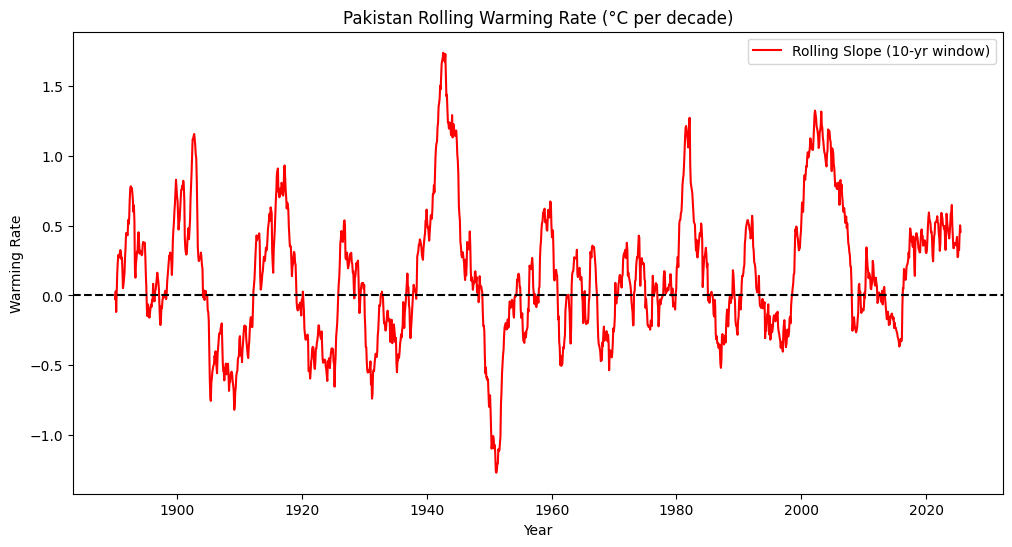

In [45]:
window = 120  # 10 years
df = pakistan.to_dataframe().reset_index()[['time','tempanomaly']].dropna()

slopes = []
years = []

for i in range(window, len(df)):
    y = df['tempanomaly'].iloc[i-window:i].values
    X = np.arange(window)
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    slopes.append(model.params[1] * 120)  # °C per decade
    years.append(df['time'].iloc[i])

# Plot rolling slope
plt.figure(figsize=(12,6))
plt.plot(years, slopes, label="Rolling Slope (10-yr window)", color="red")
plt.axhline(0, color="black", linestyle="--")
plt.title("Pakistan Rolling Warming Rate (°C per decade)")
plt.xlabel("Year")
plt.ylabel("Warming Rate")
plt.legend()
plt.show()


🔥 Extreme Events Analysis (Pakistan)

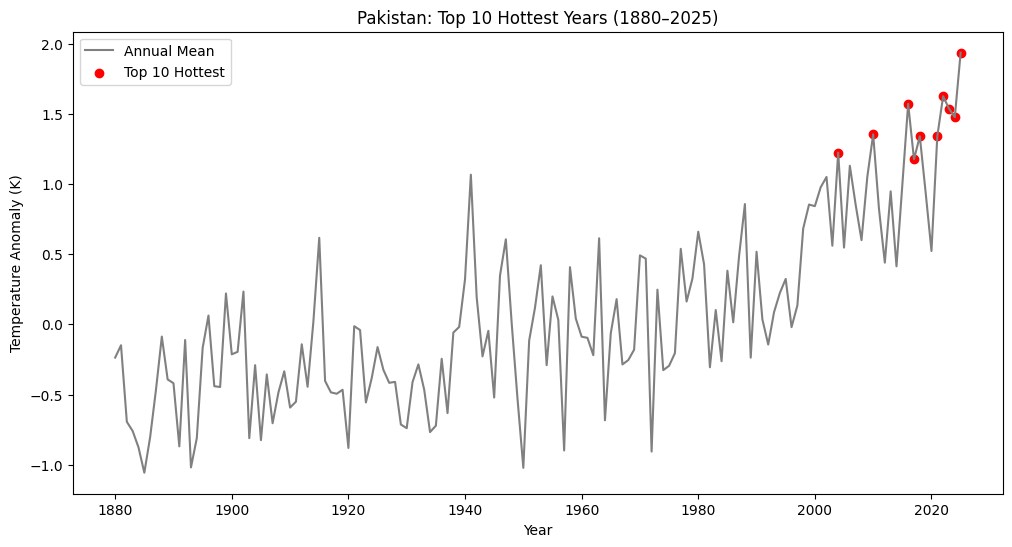

Top 10 Hottest Years in Pakistan:
     year  tempanomaly
145  2025     1.936100
142  2022     1.625966
136  2016     1.572064
143  2023     1.538280
144  2024     1.476349
130  2010     1.354259
141  2021     1.341243
138  2018     1.340357
124  2004     1.224034
137  2017     1.176918


In [47]:
# Convert Pakistan monthly data to yearly average
annual_mean = pakistan.groupby('time.year').mean()

# Convert DataArray -> DataFrame
annual_mean_df = annual_mean.to_dataframe().reset_index()

# Find top 10 hottest years
top10 = annual_mean_df.nlargest(10, 'tempanomaly')

# Plot all years + highlight top 10 hottest
plt.figure(figsize=(12,6))
plt.plot(annual_mean_df['year'], annual_mean_df['tempanomaly'], label="Annual Mean", color="gray")
plt.scatter(top10['year'], top10['tempanomaly'], color="red", label="Top 10 Hottest")
plt.title("Pakistan: Top 10 Hottest Years (1880–2025)")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (K)")
plt.legend()
plt.show()

# Print the hottest years with values
print("Top 10 Hottest Years in Pakistan:")
print(top10)


🔹 3. Global Comparison ( Is Pakistan melting Faster than the avergae World)

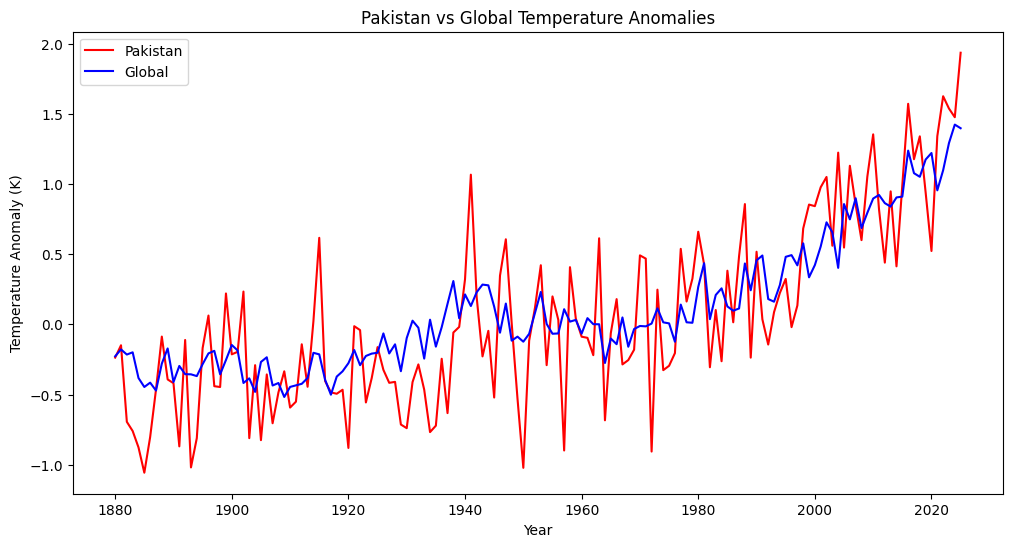

In [42]:
global_mean = data.mean(dim=["lat","lon"])

pak_df = pakistan.groupby('time.year').mean().to_dataframe()
glob_df = global_mean.groupby('time.year').mean().to_dataframe()

plt.figure(figsize=(12,6))
plt.plot(pak_df.index, pak_df['tempanomaly'], label="Pakistan", color="red")
plt.plot(glob_df.index, glob_df['tempanomaly'], label="Global", color="blue")
plt.title("Pakistan vs Global Temperature Anomalies")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (K)")
plt.legend()
plt.show()


🔹 5. Forecast with Uncertainty 

blue band = confidence intervals.

01:53:25 - cmdstanpy - INFO - Chain [1] start processing
01:53:25 - cmdstanpy - INFO - Chain [1] done processing
k:\PersonalProjects\data_analysis\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


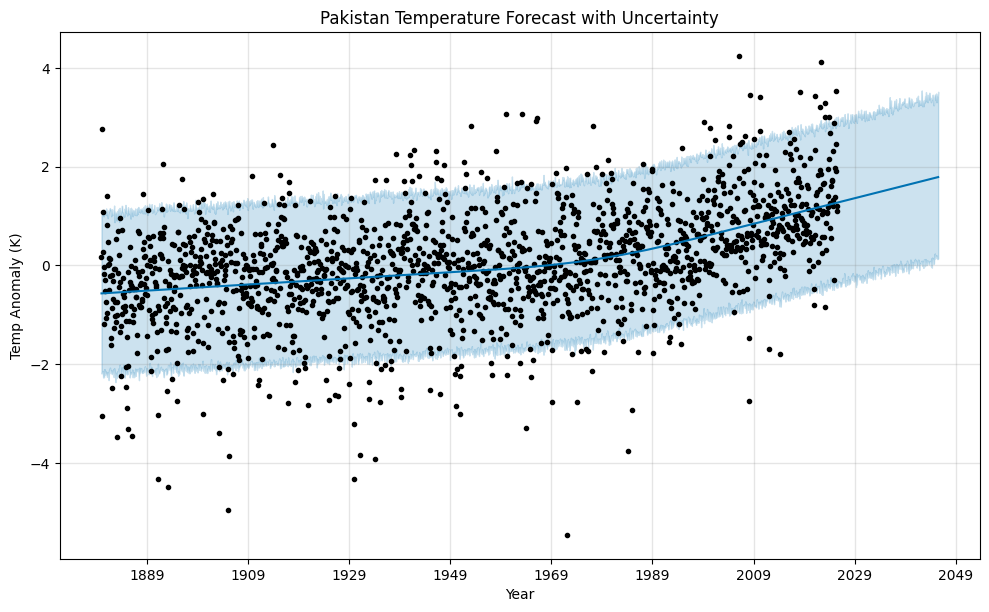

In [43]:
from prophet import Prophet

prophet_df = pakistan.to_dataframe().reset_index()[['time','tempanomaly']].dropna()
prophet_df = prophet_df.rename(columns={'time':'ds','tempanomaly':'y'})

model = Prophet(interval_width=0.9, yearly_seasonality=False)
model.fit(prophet_df)

future = model.make_future_dataframe(periods=240, freq="M")  # 20 years ahead
forecast = model.predict(future)

model.plot(forecast, xlabel="Year", ylabel="Temp Anomaly (K)")
plt.title("Pakistan Temperature Forecast with Uncertainty")
plt.show()


Spatial Heatmaps (Before vs After 2000)

Plot Pakistan map with temperature anomalies averaged for two eras:

1900–1950 (baseline)

2000–2025 (recent warming)

Show how northern Pakistan (mountains) experiences more intense warming.

👉 Purpose & Impact:

Visualizes where warming is strongest (adds a geographical perspective).

Strengthens the narrative: warming isn’t uniform, hotspots exist → policy focus areas.

In [49]:
%pip install cartopy

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 763.9 kB/s eta 0:00:14
   -- ------------------------------------- 0.8/11.0 MB 931.1 kB/s eta 0:00:11
   --- ------------------------------------ 1.0/11.0 MB 1.0 MB/s eta 0:00:10
   ---- ----------------------------------- 1.3/11.0 MB 1.0 MB/s eta 0:00:10
   ----- ---------------------------------- 1.6/11.0 MB 1.1 MB/s eta 0:00:09
   ------ --------------------------------- 1.8/11.0 MB 1.1 MB/s eta 0:00:09
   ------- -------------------------------- 2.1/11.0 MB 1.1 MB/s eta 0:00:09
   -------- ------------------------------- 2.4/11.0 MB 1.1 MB/s eta 0:00:08
   -------- ------------------------------- 2.4/11.0 MB 1.1 MB/s eta 0:00:08
   ---------- ----------------------------- 2.9/11.0 MB 1.1 MB/s eta 0:00:08
   ----------- -


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


k:\PersonalProjects\data_analysis\.venv\Lib\site-packages\cartopy\io\__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
k:\PersonalProjects\data_analysis\.venv\Lib\site-packages\cartopy\io\__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
k:\PersonalProjects\data_analysis\.venv\Lib\site-packages\cartopy\io\__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


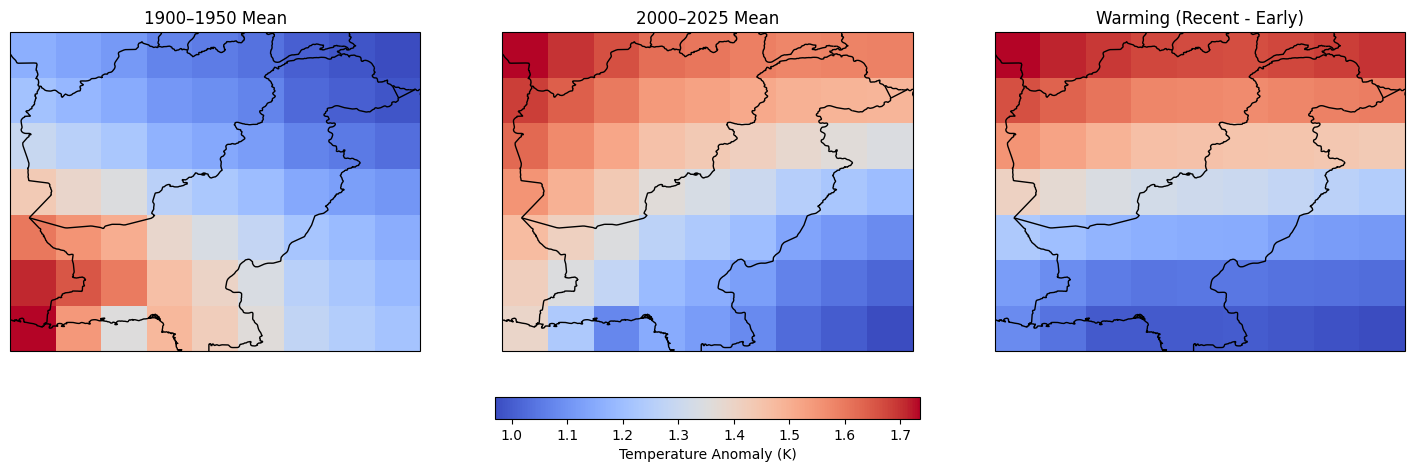

In [50]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define Pakistan bounds
pakistan_data = data.sel(lat=slice(24,37), lon=slice(60,77))

# Early period (1900–1950)
early = pakistan_data.sel(time=slice("1900","1950")).mean(dim="time")

# Recent period (2000–2025)
recent = pakistan_data.sel(time=slice("2000","2025")).mean(dim="time")

# Difference (warming map)
diff = recent - early

# Plot maps
fig, axes = plt.subplots(1,3, figsize=(18,6), subplot_kw={'projection': ccrs.PlateCarree()})

for ax, da, title in zip(axes, [early, recent, diff], ["1900–1950 Mean", "2000–2025 Mean", "Warming (Recent - Early)"]):
    im = da.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="coolwarm", add_colorbar=False)
    ax.coastlines()
    ax.set_title(title)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.LAND, edgecolor='black')

fig.colorbar(im, ax=axes, orientation="horizontal", fraction=0.046, pad=0.1, label="Temperature Anomaly (K)")
plt.show()


Seasonal Breakdown (Summer vs Winter Anomalies)

Split anomalies into:

Summer (MJJAS) → agriculture + heatwaves.

Winter (DJF) → water storage (snowpack, glaciers).

Show that summers are warming faster than winters.

👉 Purpose & Impact:

Direct policy relevance → heat stress on humans, crops, livestock.

Winters warming slower → risk to Indus River water cycle, glacier melt patterns.

Connects climate data → agriculture & food security.

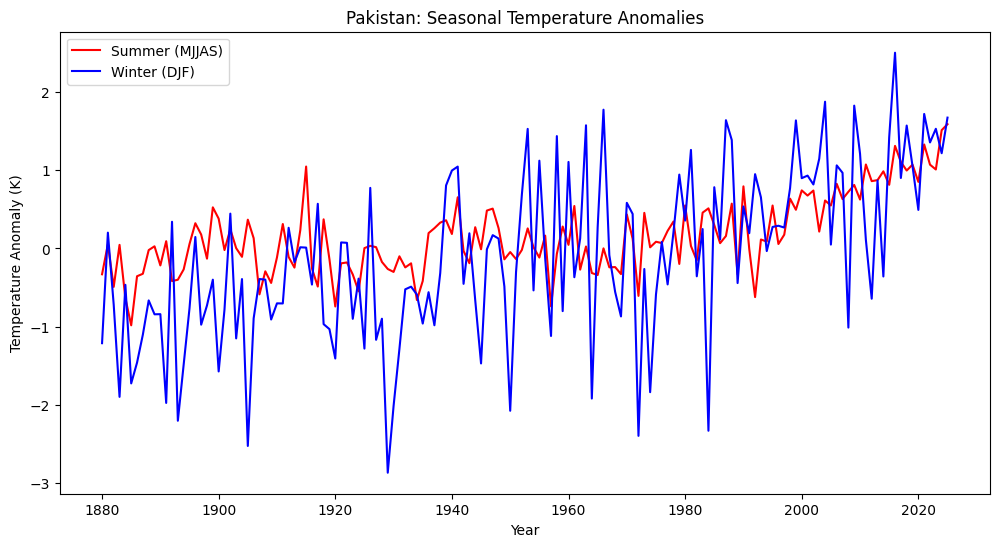

In [51]:
# Add month to dataset
df = pakistan.to_dataframe().reset_index()
df['month'] = df['time'].dt.month

# Summer (May-Sep = 5,6,7,8,9)
summer = df[df['month'].isin([5,6,7,8,9])].groupby(df['time'].dt.year)['tempanomaly'].mean()

# Winter (Dec-Feb = 12,1,2)
winter = df[df['month'].isin([12,1,2])].groupby(df['time'].dt.year)['tempanomaly'].mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(summer.index, summer, label="Summer (MJJAS)", color="red")
plt.plot(winter.index, winter, label="Winter (DJF)", color="blue")
plt.title("Pakistan: Seasonal Temperature Anomalies")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (K)")
plt.legend()
plt.show()


Global vs Pakistan vs India Comparison

Extract India’s anomaly series (neighboring region).

Compare: Global mean, Pakistan mean, India mean.

Show if Pakistan is warming at the same, slower, or faster rate.

👉 Purpose & Impact:

Regional context → Pakistan is part of South Asia, climate doesn’t respect borders.

Strengthens policy narrative: cross-border climate collaboration needed.

Makes the project look globally aware, not just national.

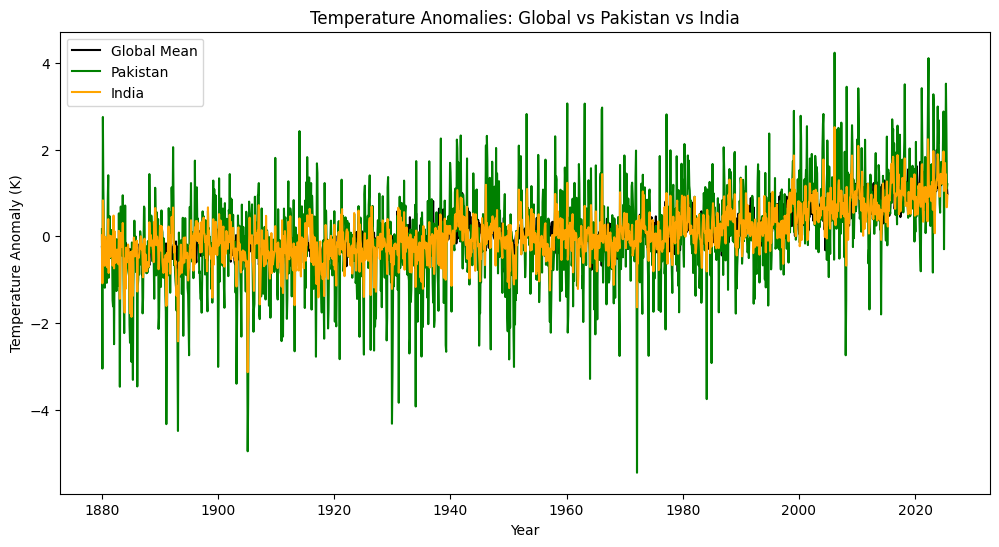

In [52]:
# Global mean
global_mean = data.mean(dim=["lat","lon"]).to_dataframe().reset_index()

# Pakistan mean (already have as `pakistan`)
pakistan_mean = pakistan.to_dataframe().reset_index()

# India mean (lat 8–37, lon 68–97 approx)
india = data.sel(lat=slice(8,37), lon=slice(68,97)).mean(dim=["lat","lon"])
india_mean = india.to_dataframe().reset_index()

# Merge and plot
plt.figure(figsize=(12,6))
plt.plot(global_mean['time'], global_mean['tempanomaly'], label="Global Mean", color="black")
plt.plot(pakistan_mean['time'], pakistan_mean['tempanomaly'], label="Pakistan", color="green")
plt.plot(india_mean['time'], india_mean['tempanomaly'], label="India", color="orange")
plt.title("Temperature Anomalies: Global vs Pakistan vs India")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (K)")
plt.legend()
plt.show()


linear trend slopes (°C per decade)** for summer vs winter and Pakistan vs India

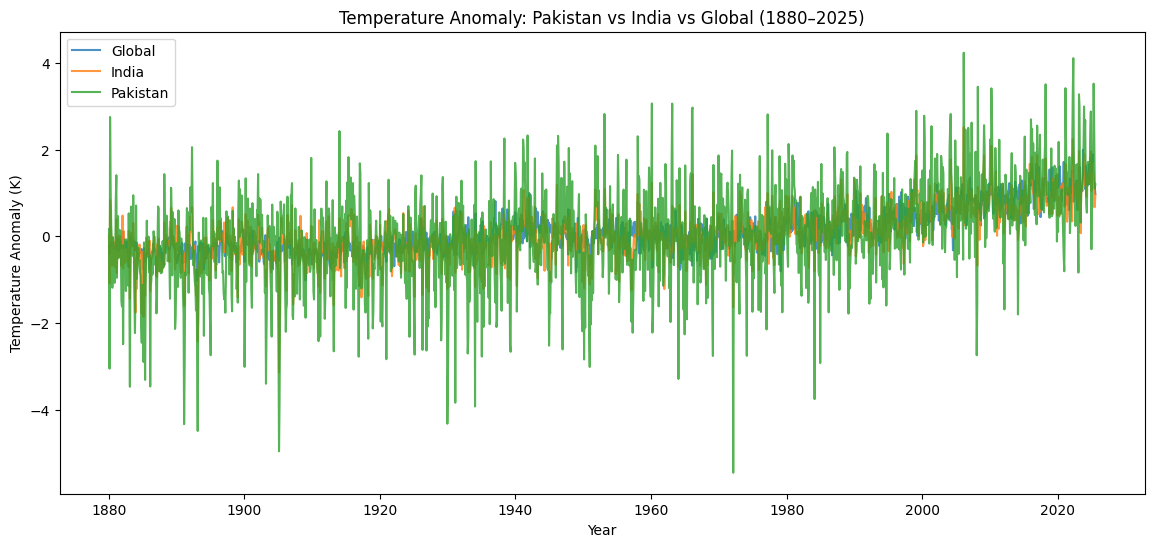

Pakistan: 0.112 °C per decade
India: 0.093 °C per decade
Global: 0.094 °C per decade


In [53]:
# --- Pakistan already extracted ---
pakistan = data.sel(lat=slice(24,37), lon=slice(60,77)).mean(dim=["lat","lon"])

# --- India region (approx lat 8–37, lon 68–97) ---
india = data.sel(lat=slice(8,37), lon=slice(68,97)).mean(dim=["lat","lon"])

# --- Global mean ---
global_mean = data.mean(dim=["lat","lon"])

# --- Convert to DataFrames for plotting ---
pakistan_df = pakistan.to_dataframe().reset_index()[['time','tempanomaly']].assign(region="Pakistan")
india_df    = india.to_dataframe().reset_index()[['time','tempanomaly']].assign(region="India")
global_df   = global_mean.to_dataframe().reset_index()[['time','tempanomaly']].assign(region="Global")

compare_df = pd.concat([pakistan_df, india_df, global_df])

# --- Plot comparison ---
plt.figure(figsize=(14,6))
for region, subset in compare_df.groupby("region"):
    plt.plot(subset["time"], subset["tempanomaly"], label=region, alpha=0.8)
plt.title("Temperature Anomaly: Pakistan vs India vs Global (1880–2025)")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (K)")
plt.legend()
plt.show()

# --- Calculate linear warming rates (°C per decade) ---
def slope_rate(df, name):
    df = df.dropna().reset_index(drop=True)
    X = np.arange(len(df)).reshape(-1,1)
    y = df['tempanomaly'].values
    model = LinearRegression().fit(X,y)
    slope = model.coef_[0]   # per month
    print(f"{name}: {slope*120:.3f} °C per decade")

slope_rate(pakistan_df, "Pakistan")
slope_rate(india_df,    "India")
slope_rate(global_df,   "Global")


🔹 Interpretation of Results

Pakistan: 0.112 °C per decade
Pakistan is warming faster than both India and the global mean. This suggests the region is more climate-vulnerable, despite its low contribution to global emissions. The faster warming rate can intensify glacier melt, water stress, and agricultural risks.

India: 0.093 °C per decade
India’s warming is slightly below Pakistan’s but nearly equal to the global mean. With its vast population and urbanization, India’s warming carries major implications for heatwaves, crop productivity, and energy demand.

Global: 0.094 °C per decade
The global mean shows a steady rise, and Pakistan’s faster warming relative to this highlights regional hotspots of climate change.


🔹 How to Phrase in Policy/Societal Context

“Pakistan is warming at ~19% faster rate than the global average, despite contributing less than 1% to global emissions. This makes Pakistan a climate injustice case, where adaptation and resilience policies (e.g., water management, agriculture planning, disaster readiness) are more urgent than ever. Comparing with India also underscores how South Asia is emerging as a high-risk climate zone.”



Seasonal Trend Analysis (Summer vs Winter)

Purpose: Show if warming is stronger in summers (heatwaves) or winters (loss of snow/ice).

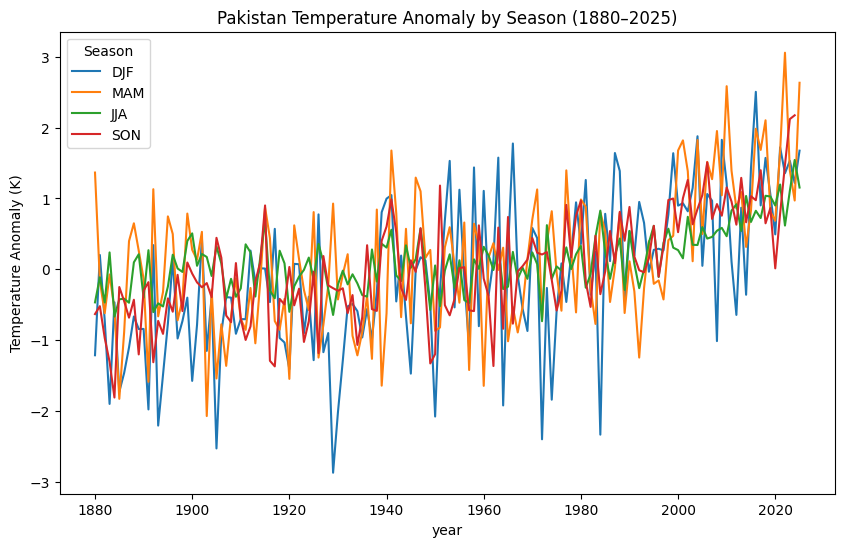

In [54]:
# Group Pakistan data by season
seasonal = pakistan.groupby('time.season').mean('time')

# Plot seasonal anomalies
plt.figure(figsize=(10,6))
for season in ['DJF', 'MAM', 'JJA', 'SON']:  # Winter, Spring, Summer, Autumn
    pakistan.sel(time=pakistan['time.season'] == season).groupby('time.year').mean().plot(label=season)

plt.title("Pakistan Temperature Anomaly by Season (1880–2025)")
plt.ylabel("Temperature Anomaly (K)")
plt.legend(title="Season")
plt.show()
